   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

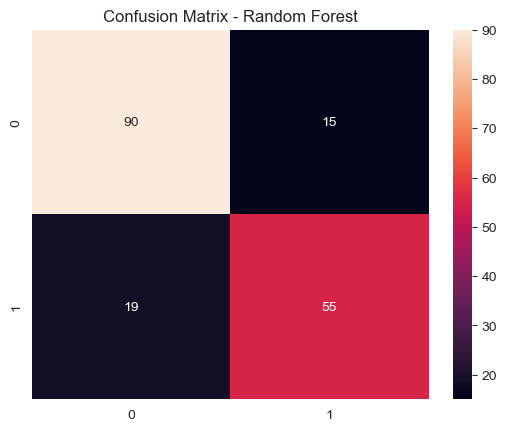

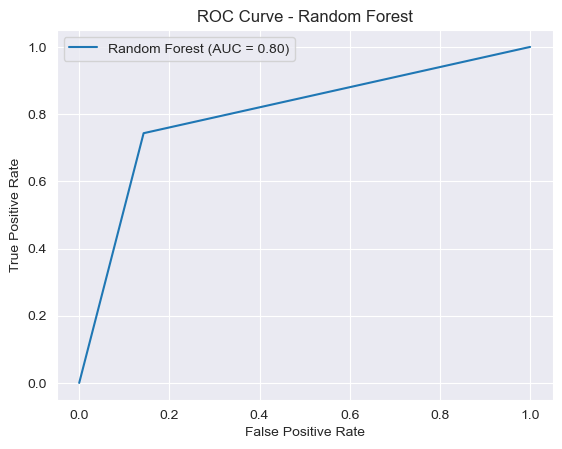

Optimized Random Forest:
Accuracy: 0.83, Precision: 0.83, Recall: 0.73, F1 Score: 0.78


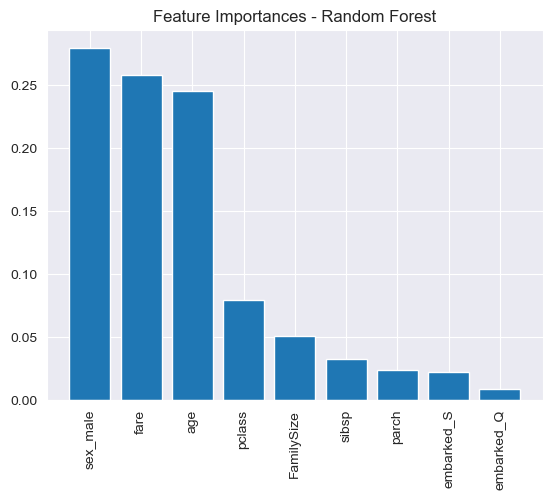

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
print(titanic.head(10))
print(titanic.describe())
print(titanic.isnull().sum())
titanic = titanic.assign(age=titanic['age'].fillna(titanic['age'].mean()))
titanic = titanic.assign(embarked=titanic['embarked'].fillna(titanic['embarked'].mode()[0]))
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']
titanic.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], inplace=True)

X = titanic.drop(columns=['survived'])
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')
print("Logistic Regression:")
evaluate_model(y_test, y_pred_log)
print("Decision Tree:")
evaluate_model(y_test, y_pred_tree)
print("Random Forest:")
evaluate_model(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix - Random Forest')
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_pred_forest)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_forest = grid_search.best_estimator_
best_forest.fit(X_train, y_train)
y_pred_best_forest = best_forest.predict(X_test)
print("Optimized Random Forest:")
evaluate_model(y_test, y_pred_best_forest)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()
